---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [87]:
######################
#      Bipartite Graphsの課題      #
# Q1. padasからGraphを読み込む
# Q2. Nodesにattributeをセットする
# Q3. Nodesの片側(L)のWeighted Projected Graphを作成する  <- NodesのL、R片側全てを指定しなくても作成は可能
# Q4. 高いリレーションシップスコア（交友関係度）を持つ人達はやはり同じタイプの映画が好きかどうか相関係数を出す。
######################

import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [117]:
def answer_one():
        
    # Your Code Here
    G_df = pd.read_csv('Employee_Movie_Choices.txt', sep='\t')

    print(G_df.head(30), '\r\n')

    G = nx.from_pandas_dataframe(G_df, 'Movie', '#Employee')
    
    return G# Your Answer Here
g = answer_one()

print('networkxバージョン: ', nx.__version__)
print('nodeの数: ', len(g.nodes()), 'edgeの数: ', len(g.edges()))

#  # pltが無いので..
# %matplotlib notebook
# nx.draw_networkx(g)

# 以下でもok
# plot_graph(g)

   #Employee                            Movie
0       Andy                         Anaconda
1       Andy                       Mean Girls
2       Andy                       The Matrix
3     Claude                         Anaconda
4     Claude  Monty Python and the Holy Grail
5     Claude                Snakes on a Plane
6      Frida                       The Matrix
7      Frida         The Shawshank Redemption
8      Frida               The Social Network
9    Georgia                         Anaconda
10   Georgia  Monty Python and the Holy Grail
11   Georgia                Snakes on a Plane
12      Joan                     Forrest Gump
13      Joan                    Kung Fu Panda
14      Joan                       Mean Girls
15       Lee                     Forrest Gump
16       Lee                    Kung Fu Panda
17       Lee                       Mean Girls
18     Pablo                  The Dark Knight
19     Pablo                       The Matrix
20     Pablo         The Shawshank

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

Nodes: ===> [('Anaconda', {'type': 'movie'}), ('Andy', {'type': 'employee'}), ('Mean Girls', {'type': 'movie'}), ('The Matrix', {'type': 'movie'}), ('Claude', {'type': 'employee'}), ('Monty Python and the Holy Grail', {'type': 'movie'}), ('Snakes on a Plane', {'type': 'movie'}), ('Frida', {'type': 'employee'}), ('The Shawshank Redemption', {'type': 'movie'}), ('The Social Network', {'type': 'movie'}), ('Georgia', {'type': 'employee'}), ('Forrest Gump', {'type': 'movie'}), ('Joan', {'type': 'employee'}), ('Kung Fu Panda', {'type': 'movie'}), ('Lee', {'type': 'employee'}), ('The Dark Knight', {'type': 'movie'}), ('Pablo', {'type': 'employee'}), ('The Godfather', {'type': 'movie'}), ('Vincent', {'type': 'employee'})] 

Edges: ===> [('Anaconda', 'Andy', {}), ('Anaconda', 'Claude', {}), ('Anaconda', 'Georgia', {}), ('Andy', 'Mean Girls', {}), ('Andy', 'The Matrix', {}), ('Mean Girls', 'Joan', {}), ('Mean Girls', 'Lee', {}), ('The Matrix', 'Frida', {}), ('The Matrix', 'Pablo', {}), ('Claude'

<IPython.core.display.Javascript object>


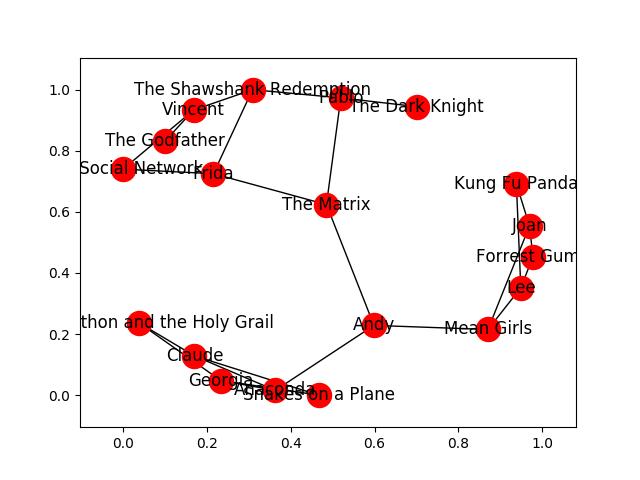

In [109]:
def answer_two():
    
    # Your Code Here
    # Graph中のnodeのattributeにtypeをセットする
    G = answer_one()
    nx.set_node_attributes(G, 'type', '')

    # bipartite graphのmovie node列とemployee node列をlistで取得する
#     G_df = pd.read_csv('Employee_Movie_Choices.txt', sep='\t')
#     employees = G_df['#Employee'].values         <== bipartite.setsで取れる
#     movies = G_df['Movie'].values
    sets_list = list(bipartite.sets(G))
    movies = list(sets_list[0])
    employees = list(sets_list[1])
    
    for emp in employees:
        G.node[emp]['type'] = 'employee'
    for movie in movies:
        G.node[movie]['type'] = 'movie'
    
    return G# Your Answer Here
g = answer_two()

print('Nodes: ===>', g.nodes(data=True), '\r\n')
print('Edges: ===>', g.edges(data=True))
plot_graph(g)

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


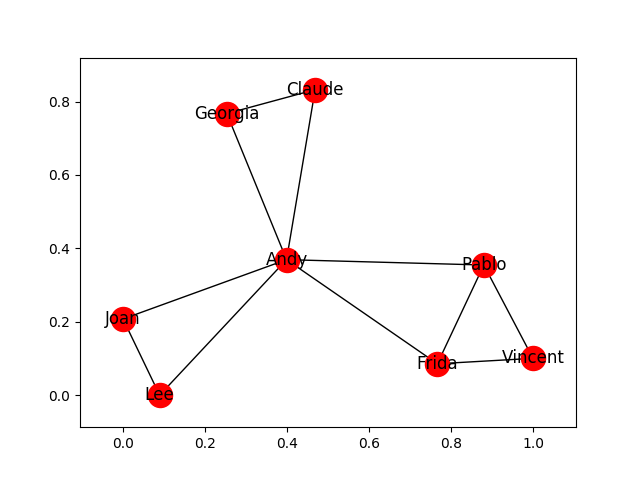

Nodes: ===> [('Joan', {'type': 'employee'}), ('Frida', {'type': 'employee'}), ('Pablo', {'type': 'employee'}), ('Vincent', {'type': 'employee'}), ('Lee', {'type': 'employee'}), ('Georgia', {'type': 'employee'}), ('Andy', {'type': 'employee'}), ('Claude', {'type': 'employee'})] 

Edges: ===> [('Joan', 'Andy', {'weight': 1}), ('Joan', 'Lee', {'weight': 3}), ('Frida', 'Andy', {'weight': 1}), ('Frida', 'Pablo', {'weight': 2}), ('Frida', 'Vincent', {'weight': 2}), ('Pablo', 'Andy', {'weight': 1}), ('Pablo', 'Vincent', {'weight': 1}), ('Lee', 'Andy', {'weight': 1}), ('Georgia', 'Andy', {'weight': 1}), ('Georgia', 'Claude', {'weight': 3}), ('Andy', 'Claude', {'weight': 1})] <= Weightsが求められていることが分かる


In [110]:
def answer_three():
        
    # Your Code Here
    B = answer_two()
    
#     G_df = pd.read_csv('Employee_Movie_Choices.txt', sep='\t')
#     employees = G_df['#Employee'].values #         <== bipartite.setsで取れる

    sets_list = list(bipartite.sets(B))
    employees = list(sets_list[1])

    if bipartite.is_bipartite_node_set(B, employees):
        G = bipartite.weighted_projected_graph(B, employees)
    return G# Your Answer Here

g = answer_three()

plot_graph(g)
print('Nodes: ===>', g.nodes(data=True), '\r\n')
print('Edges: ===>', g.edges(data=True), '<= Weightsが求められていることが分かる')

###
# おまけ： The degree function returns a dictionary of the number of edges connected to each node.
###
# degree = g.degree()
# print(degree)

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [114]:
def answer_four():
        
    # Your Code Here
    # 高いリレーションシップスコア（交友関係度）を持つ人達はやはり同じタイプの映画が好きかどうか相関係数を出す。
    
    # Employee_Relationships.txt, has data on the relationships between different coworkers.
    # The relationship score has value of -100 (Enemies) to +100 (Best Friends). 
    # A value of zero means the two employees haven't interacted or are indifferent.
    df = pd.read_csv('Employee_Relationships.txt', sep='\t', header=None, names=['L_Node', 'R_Node', 'Relation_Score'])

    print(df.head(30))

    B = answer_three()
    print('\r\nQ3で求めたWeighted Projected Graphのedgeの数: ', len(B.edges(data=True)), '\r\n')
    # If two employees have no movies in common it should be treated as a 0, not a missing value
    # 同じ好みの映画が一つもマッチし無い場合はweightを0にする。(corrを正しく求めるために)
    for node_l in B.nodes():
        for node_r in B.nodes():
            if node_l == node_r:
                continue
            else:
                if not B.has_edge(node_l, node_r):
                    B.add_edge(node_l, node_r, weight=0)
    
    print('11から、weightの全関係図の数 = 1+2+..+{0} ='.format(len(B.nodes())-1), len(B.edges(data=True)), 'にedgeの数を増やした。\r\n')
    
    df['Movie_Projected_Weight'] = None

    for index, row in df.iterrows():
        A_person = row['L_Node']
        B_person = row['R_Node']
        df.loc[index, 'Movie_Projected_Weight'] = B.edge[A_person][B_person]['weight']
        
    # df[(df[l] == l_node) & (df[r] == r_node)] = df[(df[l] == l_node) & (df[r] ==r_node)].set_value(0, w, weight)  <= 最初考えた変更式(却下)
    
    # データ形式が片方と合わないとdf.corrは計算してくれない。
    df['Relation_Score'] = np.float64(df['Relation_Score'])
    df['Movie_Projected_Weight'] = np.float64(df['Movie_Projected_Weight'])
    
    print(df[['Relation_Score', 'Movie_Projected_Weight']].head(30), '\r\n')
    
    df_corr = df[['Relation_Score', 'Movie_Projected_Weight']].corr(method='pearson')
    print(df_corr)

    return df_corr.loc['Relation_Score', 'Movie_Projected_Weight']# Your Answer Here
answer_four()

     L_Node   R_Node  Relation_Score
0      Andy   Claude               0
1      Andy    Frida              20
2      Andy  Georgia             -10
3      Andy     Joan              30
4      Andy      Lee             -10
5      Andy    Pablo             -10
6      Andy  Vincent              20
7    Claude    Frida               0
8    Claude  Georgia              90
9    Claude     Joan               0
10   Claude      Lee               0
11   Claude    Pablo              10
12   Claude  Vincent               0
13    Frida  Georgia               0
14    Frida     Joan               0
15    Frida      Lee               0
16    Frida    Pablo              50
17    Frida  Vincent              60
18  Georgia     Joan               0
19  Georgia      Lee              10
20  Georgia    Pablo               0
21  Georgia  Vincent               0
22     Joan      Lee              70
23     Joan    Pablo               0
24     Joan  Vincent              10
25      Lee    Pablo               0
2

0.78839622217334759